##### Automatic counting stations are installed in four cities that count the number of cyclists passing by this street. The data of 19 such systems are publicly available, we selected 4 of them for you. The data is aggregated on a 15-minute basis:

##### the entry for 7:15 corresponds to the count of cyclists between 7:00 and 7:15. Naturally, the amount of cyclists passing by changes over the months, e.g., in summer there are more cyclists than in winter. In this task, we want to analyze whether this distribution of cyclists passing by over the months differs between the 4 counting stations.

In [1]:
from scipy.stats import chi2_contingency


In [2]:
import pandas as pd


df = pd.read_csv('cyclist_counts.csv',skiprows=8,sep=';')
# df['date'] = pd.to_datetime(df['date'],format='%d.%m.%Y')
# df['time'] = pd.to_datetime(df['date'],format='HH:MM:SS')
df

,date,time,fleher deich ost stromaufwaerts,fleher deich west stromabwaerts,okb nord,okb sued
0,01.01.2021,00:00:00,0.0,0.0,2.0,0.0
1,01.01.2021,00:15:00,0.0,0.0,1.0,0.0
2,01.01.2021,00:30:00,0.0,0.0,1.0,7.0
3,01.01.2021,00:45:00,0.0,0.0,2.0,1.0
4,01.01.2021,01:00:00,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...
35035,31.12.2021,22:45:00,0.0,0.0,0.0,6.0
35036,31.12.2021,23:00:00,0.0,0.0,0.0,0.0
35037,31.12.2021,23:15:00,1.0,0.0,1.0,2.0
35038,31.12.2021,23:30:00,0.0,0.0,1.0,2.0


In [3]:
df['datetime'] = df['date'] + ' ' + df['time']
df['datetime'] = pd.to_datetime(df['datetime'],format='%d.%m.%Y %H:%M:%S')
df = df.drop(columns=['date','time'])
df.set_index('datetime',inplace=True)

df

,fleher deich ost stromaufwaerts,fleher deich west stromabwaerts,okb nord,okb sued
datetime,,,,
2021-01-01 00:00:00,0.0,0.0,2.0,0.0
2021-01-01 00:15:00,0.0,0.0,1.0,0.0
2021-01-01 00:30:00,0.0,0.0,1.0,7.0
2021-01-01 00:45:00,0.0,0.0,2.0,1.0
2021-01-01 01:00:00,0.0,0.0,4.0,1.0
...,...,...,...,...
2021-12-31 22:45:00,0.0,0.0,0.0,6.0
2021-12-31 23:00:00,0.0,0.0,0.0,0.0
2021-12-31 23:15:00,1.0,0.0,1.0,2.0


Assuming

Winter =  1st of October and ends on the 31st of March

Summer = 1st of April and ends on the 30th of September

<AxesSubplot:xlabel='datetime'>

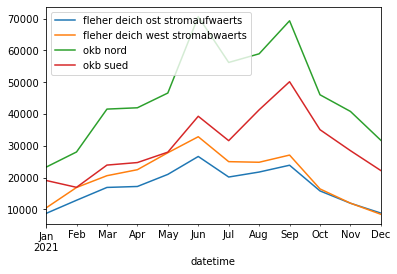

In [4]:
df.groupby(pd.Grouper(freq='M')).sum().plot()

In [5]:
df_summer = df[(df.index >= '2021-04-01 00:00:00') & (df.index <= '2021-09-30 00:00:00')]
df_winter = df.drop(index=df_summer.index)

In [6]:
df_summer.sum()

fleher deich ost stromaufwaerts    130051.0
fleher deich west stromabwaerts    159509.0
okb nord                           341653.0
okb sued                           213647.0
dtype: float64

In [7]:
df_winter.sum()

fleher deich ost stromaufwaerts     75736.0
fleher deich west stromabwaerts     85396.0
okb nord                           213616.0
okb sued                           147254.0
dtype: float64


### PART A

Perform a detailed descriptive analysis of the data set. Use appropriate statistical measures to describe the most important variables. Include at least one statistical graphic. The analysis should show descriptively whether there is a difference between the counting stations or not.


In [8]:
df.describe()

,fleher deich ost stromaufwaerts,fleher deich west stromabwaerts,okb nord,okb sued
count,35036.000000,35036.000000,35036.000000,35036.000000
mean,5.873587,6.990096,15.848527,10.300862
std,8.128066,10.551716,16.700837,11.625587
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000
50%,3.000000,3.000000,10.000000,6.000000
75%,9.000000,9.000000,26.000000,16.000000
max,107.000000,134.000000,109.000000,193.000000


<AxesSubplot:xlabel='datetime'>

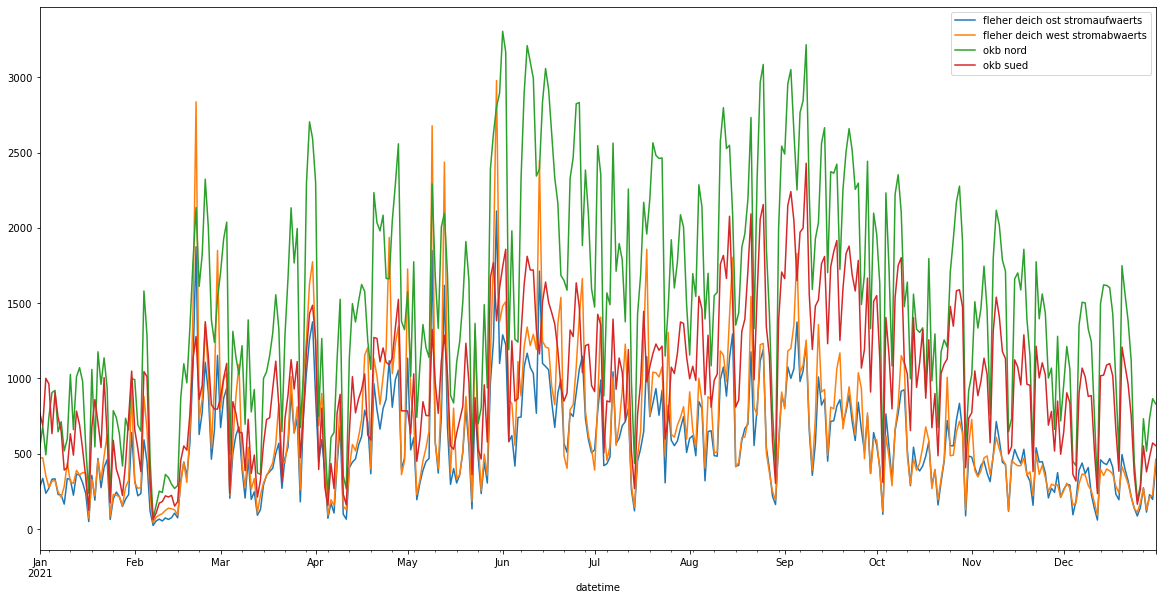

In [9]:
df.groupby(pd.Grouper(freq='D')).sum().plot(figsize=(20,10))

### PART B

We restrict ourselves now to the timeslot 7:45 to 8:00. Set up a contingency table that counts for
every month and every counting station how many cyclists passed by during these time slots. Is
there a significant difference between the distribution over the months for the 4 counting stations?
If yes, which counting stations differ? Use appropriate statistical hypothesis tests to answer this.
Take care of the multiple testing problem.

In [10]:
100 +	150 +	95 +	140

485

In [11]:
df_contigency = df[df.index.strftime('%H:%M:%S') == '08:00:00'].groupby(pd.Grouper(freq='M')).sum()
df_contigency

,fleher deich ost stromaufwaerts,fleher deich west stromabwaerts,okb nord,okb sued
datetime,,,,
2021-01-31,114.0,76.0,395.0,212.0
2021-02-28,144.0,128.0,385.0,203.0
2021-03-31,237.0,174.0,629.0,415.0
2021-04-30,216.0,132.0,589.0,311.0
2021-05-31,241.0,166.0,597.0,289.0
2021-06-30,373.0,278.0,1086.0,473.0
2021-07-31,261.0,198.0,705.0,303.0
2021-08-31,297.0,224.0,898.0,529.0
2021-09-30,438.0,314.0,1141.0,786.0


<AxesSubplot:xlabel='datetime'>

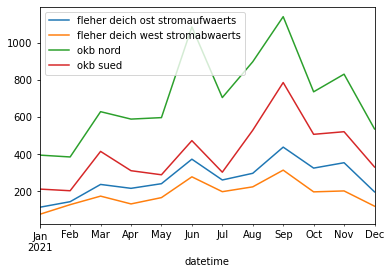

In [12]:
df_contigency.plot()

### Using Chai Squared Methode

The null hypothesis is that there is no association between months and cyclist passing by each station.
The alternative hypothesis is that there is a significant associaiton.

In [13]:
chi2, pval, dof, _ = chi2_contingency(df_contigency, correction=False)

In [14]:
chi2, pval, dof

(133.4375693753757, 4.982630573447172e-14, 33)

choosing an error chance of 5% we set the value for significant level i.e. alpha to 0.05

The p-value of 4.9826e-14 (which is a very small number close to zero) suggests that the observed differences between the distribution over the months for the 4 counting stations are extremely unlikely to be due to chance variation alone, assuming that the null hypothesis (i.e., no difference between the expected and observed counts) is true.

Since the p-value is less than our chosen significance level (e.g., 0.05), we can reject the null hypothesis and conclude that there is a significant difference between the distribution over the months for the 4 counting stations. However, we should also consider the effect size and practical significance of the observed differences, as well as any potential confounding variables or sources of bias in the data or analysis.

Additionally, since we conducted multiple hypothesis tests (one for each counting station), we should also be cautious about drawing strong conclusions without accounting for the multiple testing problem. One way to address this issue is to use a Bonferroni correction or other appropriate adjustment to control the family-wise error rate (the probability of making at least one type I error across all tests) at the desired level.

Obataining which counting stations differ

In [90]:
for e,col in enumerate(df_contigency.columns):
    for col2 in df_contigency.columns[e:]:
        chi2, pval, dof, _ = chi2_contingency(df_contigency[[col,col2]], correction=False)

        adjusted_alpha = 0.05 / 2

        if pval<adjusted_alpha:
            print(col,'and',col2," : ",pval)

fleher deich ost stromaufwaerts and okb nord  :  0.01695073182338143
fleher deich ost stromaufwaerts and okb sued  :  3.807454998866826e-06
fleher deich west stromabwaerts and okb sued  :  3.0573180780086802e-09
okb nord and okb sued  :  9.825089968624514e-14


FDR correction with chi squared


In [85]:
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests


# Perform multiple chi-square tests
p_values = []
stattions = []
for e,col in enumerate(df_contigency.columns):
    for col2 in df_contigency.columns[e:]:
        chi2, pval, dof, _ = chi2_contingency(df_contigency[[col,col2]], correction=False)
        stattions.append(col+' '+col2)
        p_values.append(pval)


# Perform FDR correction
reject, p_values_corrected, alpha_sidak, alpha_bonf = multipletests(p_values, method="fdr_bh")

# Print the corrected p-values and rejected hypotheses
for i, p in enumerate(p_values_corrected):
    if reject[i]:
        pass
        print(f"{stattions[i]}: p = {p} (rejected null hypothesis)")
    else:
        # print(f"{stattions[i]}: p = {p}")
        pass

fleher deich ost stromaufwaerts okb nord: p = 0.04237682955845357 (rejected null hypothesis)
fleher deich ost stromaufwaerts okb sued: p = 1.269151666288942e-05 (rejected null hypothesis)
fleher deich west stromabwaerts okb sued: p = 1.52865903900434e-08 (rejected null hypothesis)
okb nord okb sued: p = 9.825089968624513e-13 (rejected null hypothesis)


ANOVA

In [76]:
from scipy.stats import f_oneway


for e,col in enumerate(df_contigency.columns):
    for col2 in df_contigency.columns[e:]:

        pval = f_oneway(df_contigency[col], df_contigency[col2])[1]
        adjusted_alpha = 0.05 / 2
        

        if pval<adjusted_alpha:
            print(col,'and',col2," : ",pval)

fleher deich ost stromaufwaerts and fleher deich west stromabwaerts  :  0.023086962192025037
fleher deich ost stromaufwaerts and okb nord  :  6.070700529871683e-06
fleher deich ost stromaufwaerts and okb sued  :  0.019024743644799887
fleher deich west stromabwaerts and okb nord  :  2.9263614139677806e-07
fleher deich west stromabwaerts and okb sued  :  0.00029721479650745056
okb nord and okb sued  :  0.001673108796762805


In [77]:
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests


# Perform multiple chi-square tests
p_values = []
stattions = []
for e,col in enumerate(df_contigency.columns):
    for col2 in df_contigency.columns[e:]:
        pval = f_oneway(df_contigency[col], df_contigency[col2])[1]
        stattions.append(col+' '+col2)
        p_values.append(pval)


# Perform FDR correction
reject, p_values_corrected, alpha_sidak, alpha_bonf = multipletests(p_values, method="fdr_bh")

# Print the corrected p-values and rejected hypotheses
for i, p in enumerate(p_values_corrected):
    if reject[i]:
        pass
        print(f"{stattions[i]}: p = {p} (rejected null hypothesis)")
    else:
        # print(f"{stattions[i]}: p = {p}")
        pass

fleher deich ost stromaufwaerts fleher deich west stromabwaerts: p = 0.03847827032004173 (rejected null hypothesis)
fleher deich ost stromaufwaerts okb nord: p = 3.0353502649358414e-05 (rejected null hypothesis)
fleher deich ost stromaufwaerts okb sued: p = 0.038049487289599775 (rejected null hypothesis)
fleher deich west stromabwaerts okb nord: p = 2.9263614139677806e-06 (rejected null hypothesis)
fleher deich west stromabwaerts okb sued: p = 0.0009907159883581686 (rejected null hypothesis)
okb nord okb sued: p = 0.004182771991907012 (rejected null hypothesis)


Kruskal Wallis

In [57]:
from scipy.stats import kruskal


for e,col in enumerate(df_contigency.columns):
    for col2 in df_contigency.columns[e:]:

        pval = kruskal(df_contigency[col], df_contigency[col2])[1]
        adjusted_alpha = 0.05 / 2

        if pval<adjusted_alpha:
            print(col,'and',col2," : ",pval)

fleher deich ost stromaufwaerts and okb nord  :  5.312128159411693e-05
fleher deich west stromabwaerts and okb nord  :  3.225641456243768e-05
fleher deich west stromabwaerts and okb sued  :  0.00027550381143426816
okb nord and okb sued  :  0.0018227351663914028


Tukey

In [63]:
import statsmodels.stats.multicomp as mc


for e,col in enumerate(df_contigency.columns):
    for col2 in df_contigency.columns[e:]:

        comp = mc.MultiComparison(df_contigency[col], df_contigency[col2])
        result = comp.tukeyhsd()


        # adjusted_alpha = 0.05 / 2

        # if pval<adjusted_alpha:
        #     print(col,'and',col2," : ",pval)

/home/muhammadhaiderzaidi/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/muhammadhaiderzaidi/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [65]:
result.

0

*You are free in the choice of methods, as long as the task is answered appropriately. Your report should contain an introduction and a short description of the task and the data set. Moreover, you have to describe all statistical methods you used. Please do so in a mathematical way: If possible, give mathematical definitions of the methods. The report should end with a summary and a discussion of the results.*

*Be sure to do proper literature work: If you use a method, cite a book in which it is explained. When you make a statement, support it with a proof or a literature citation.*